<a href="https://colab.research.google.com/github/hriteshMaikap/fromScratch/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Regression from Scratch

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

#####A dataset was created for testing purposes including a single independant variable `engine size` against the `price` (of a car). It had a extra column due to indexing which is dropped.
#####Original dataset: https://www.kaggle.com/datasets/toramky/automobile-dataset

In [ ]:
df = pd.read_csv("/content/final1.csv")
df = df.drop(["Unnamed: 0"], axis=1)

####1. Data Splitting

In [ ]:
X = df['engine-size']
y = df["price"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

####2. Data Standardization

In [ ]:
u = X_train.mean()
std = X_train.std()
X_train = (X_train-u)/std

####3. Scatter Plot (Before Prediction)

<ipython-input-21-fdb4c28c1822>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


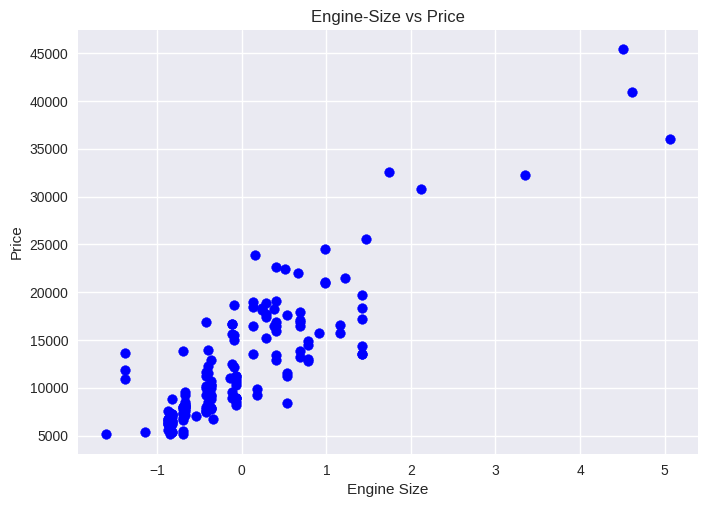

In [ ]:
plt.style.use('seaborn')
plt.scatter(X_train,y_train,color='blue')
plt.title("Engine-Size vs Price")
plt.xlabel("Engine Size")
plt.ylabel("Price")
plt.show()

In [ ]:
#Converting data to numpy array
X_train = X_train.values
y_train = y_train.values

#### 4. Custom function to return the equation of a straight line

In [ ]:
def prediction(x, theta):
  y_pred = theta[0]+theta[1]*x
  return y_pred

#### 5. Function to calculate the MSE

In [ ]:
def error(x, y, theta):
  num_of_entries = x.shape[0]
  total_error = 0
  for i in range(num_of_entries):
    y_pred = prediction(x[i], theta)
    total_error += (y_pred-y[i])**2

  return (total_error/num_of_entries)

####6. Gradient Calculation

In [ ]:
def gradient(x, y, theta):
  num_of_entries = x.shape[0]
  grad = np.zeros((2,)) # like [0.0, 0.0]
  for i in range(num_of_entries):
    x_temp = x[i]
    y_pred = prediction(x_temp, theta)
    y_temp = y[i]
    grad[0] += (y_pred-y_temp)
    grad[1] +=(y_pred-y_temp)*x_temp
  return (grad/num_of_entries)

####7. Gradient Descent Optimization

In [ ]:
def gradientDescent(x, y, max_steps=100, learning_rate=0.1):
  theta = np.zeros((2,))
  error_list = []
  theta_list = []

  for i in range(max_steps):
    grad = gradient(x, y, theta)
    print(grad)
    e = error(x, y, theta)

    theta[0] = theta[0]-learning_rate*grad[0]
    theta[1] = theta[1]-learning_rate*grad[1]

    theta_list.append((theta[0], theta[1]))
    error_list.append(e)

  return theta, error_list, theta_list

In [ ]:
theta, error_list, theta_list = gradientDescent(X_train, y_train)

[-12573.68125    -5857.3337024]
[-11316.313125    -5275.26116572]
[-10184.6818125   -4751.03208738]
[-9166.21363125 -4278.8982737 ]
[-8249.59226813 -3853.68275775]
[-7424.63304131 -3470.7230337 ]
[-6682.16973718 -3125.81993222]
[-6013.95276346 -2815.19157646]
[-5412.55748712 -2535.43191355]
[-4871.30173841 -2283.47336714]
[-4384.17156456 -2056.55320128]
[-3945.75440811 -1852.1832269 ]
[-3551.1789673  -1668.12251873]
[-3196.06107057 -1502.35284343]
[-2876.45496351 -1353.05652961]
[-2588.80946716 -1218.59653698]
[-2329.92852044 -1097.49850612]
[-2096.9356684   -988.43459208]
[-1887.24210156  -890.20890449]
[-1698.5178914  -801.7443946]
[-1528.66610226  -722.07104539]
[-1375.79949204  -650.31523526]
[-1238.21954283  -585.69015875]
[-1114.39758855  -527.48719923]
[-1002.95782969  -475.0681588 ]
[-902.66204673 -427.85826052]
[-812.39584205 -385.33984588]
[-731.15625785 -347.0466987 ]
[-658.04063206 -312.55893301]
[-592.23656886 -281.49838905]
[-533.01291197 -253.52448663]
[-479.71162077 -22

In [ ]:
y_pred = prediction(X_train, theta)
print(y_pred)

[19735.76867065 10395.89704533  7430.85843411 16474.22619831
 14991.70689271  7727.36229524  7430.85843411 10099.39318421
  8468.62194804 13953.94337878 19439.26480953 14250.4472399
 13657.43951766  7430.85843411  7727.36229524 10099.39318421
 20921.78411513 12174.92021206 11878.41635093 10395.89704533
 11878.41635093  5800.08719795 18401.5012956   7727.36229524
  8616.8738786  10544.14897589 14991.70689271  8468.62194804
 10099.39318421  7579.11036467 13657.43951766  8616.8738786
 10395.89704533  7430.85843411 16622.47812887  8616.8738786
 10099.39318421 20921.78411513 16622.47812887 16622.47812887
 10395.89704533 42418.31404643 13360.93565654 14991.70689271
 10395.89704533  8616.8738786  10395.89704533 14991.70689271
 12174.92021206  8616.8738786  10099.39318421 20921.78411513
  7727.36229524 18401.5012956  13360.93565654  8616.8738786
 14250.4472399  12174.92021206 12174.92021206 14250.4472399
  7727.36229524 10099.39318421 10099.39318421 16622.47812887
 10099.39318421 10099.3931842

####8. Plotting the optimization of Dependant Variable and Constant

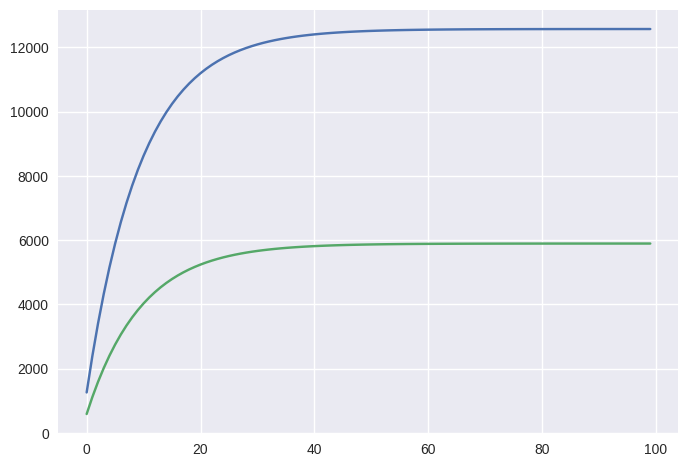

In [ ]:
plt.plot(theta_list)
plt.show()

####9. Plotting the decrease in error (Optimization)

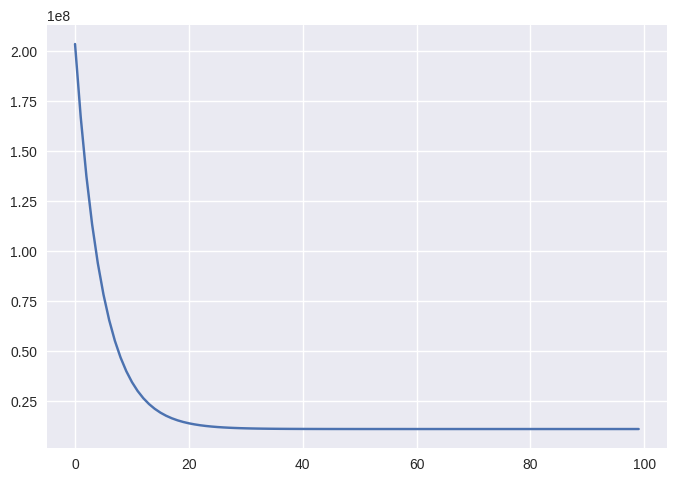

In [ ]:
plt.plot(error_list)
plt.show()

####10. Plotting the final Prediction

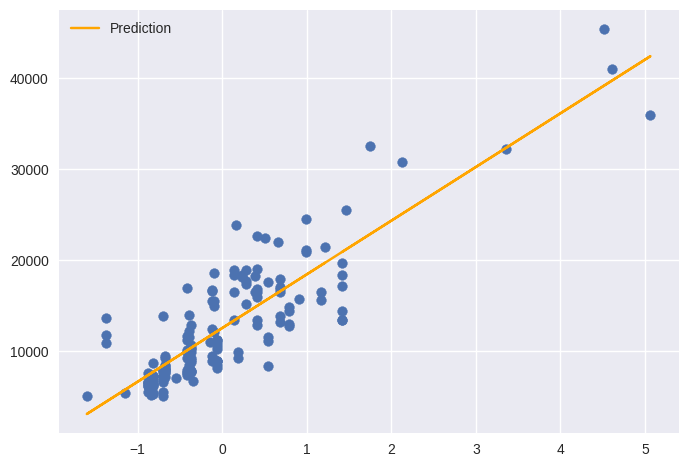

In [ ]:
plt.scatter(X_train,y_train)
plt.plot(X_train,y_pred,color='orange',label="Prediction")
plt.legend()
plt.show()